In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv("fifa_eda_stats.csv")
df.head()


,ID,Name,Age,Nationality,Overall,Potential,Potential1,Club,Value,Wage,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,94,FC Barcelona,€110.5M,€565K,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,94,Juventus,€77M,€405K,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,93,Paris Saint-Germain,€118.5M,€290K,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,93,Manchester United,€72M,€260K,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,92,Manchester City,€102M,€355K,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
df.drop('Loaned From', axis=1, inplace=True)
df.dropna(subset=['Club'], inplace=True)

In [5]:
players_per_club = df["Club"].value_counts()

players_per_nationality = df["Nationality"].value_counts()

print("Number of players in each club:")
print(players_per_club)

print("\nNumber of players of each nationality:")
print(players_per_nationality)


Number of players in each club:
FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
                           ..
Vitória                    20
Bahia                      20
Sligo Rovers               19
Limerick FC                19
Derry City                 18
Name: Club, Length: 651, dtype: int64

Number of players of each nationality:
England      1655
Germany      1195
Spain        1071
Argentina     935
France        910
             ... 
Guam            1
Fiji            1
Liberia         1
Mauritius       1
Botswana        1
Name: Nationality, Length: 163, dtype: int64


In [6]:
top_players = df.sort_values(by="Overall", ascending=False)

print("Top 10 Players by Overall Rating:")
print(top_players.head(10))

Top 10 Players by Overall Rating:
        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
12  182493           D. Godín   32     Uruguay       90         90   

                   Club        Value      Wage Preferred Foot  ...  Composure  \
0          FC Barcelona  110500000.0  565000.0           Left  ...       96.0   
1              Juventus   7700000

In [7]:
import pandas as pd

def find_best_player_per_club(data):
    grouped_by_club = data.groupby("Club")

    def best_player(group):
            return group.sort_values(by="Overall", ascending=False).head(1)

    
    best_players_per_club = grouped_by_club.apply(best_player)
    return best_players_per_club

best_players = find_best_player_per_club(df.copy())  

print(best_players)


                                 ID            Name  Age Nationality  Overall  \
Club                                                                            
 SSV Jahn Regensburg  4587   211920     M. Grüttner   32     Germany       71   
1. FC Heidenheim 1846 2053   211703  M. Schnatterer   32     Germany       75   
1. FC Kaiserslautern  5084   216408      L. Spalvis   23   Lithuania       70   
1. FC Köln            189    200316         T. Horn   25     Germany       83   
1. FC Magdeburg       4309   178032     R. Brégerie   31      France       71   
...                             ...             ...  ...         ...      ...   
Zagłębie Sosnowiec    10324  213856   K. Wrzesiński   24      Poland       65   
Çaykur Rizespor       1531   229092         A. Umar   23     Nigeria       76   
Örebro SK             4344   197240       N. Besara   27      Sweden       71   
Östersunds FK         6023   213612        H. Aiesh   23      Sweden       69   
Śląsk Wrocław         5067  

Top 10 Penalty Takers:
               Name  Penalties
206    M. Balotelli       92.0
118         Fabinho       91.0
16          H. Kane       90.0
297        M. Kruse       90.0
945       L. Baines       90.0
507    R. Boudebouz       90.0
384      D. Perotti       90.0
823      R. Jiménez       90.0
109  Z. Ibrahimović       89.0
68          M. Reus       89.0


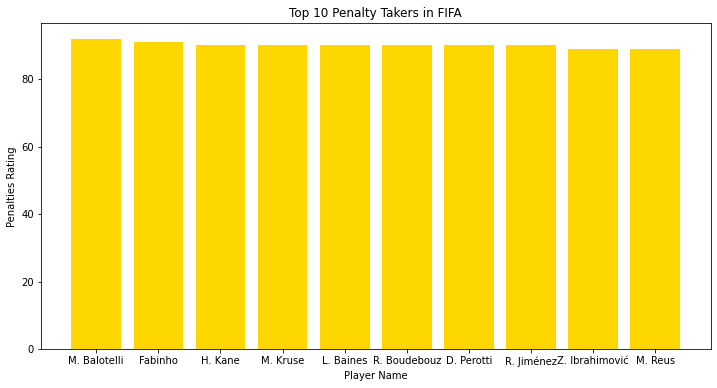

In [4]:
top_penalty_takers = df.sort_values(by="Penalties", ascending=False).head(10)

print("Top 10 Penalty Takers:")
print(top_penalty_takers[["Name", "Penalties"]])

plt.figure(figsize=(12, 6))
plt.bar(top_penalty_takers['Name'], top_penalty_takers['Penalties'], color='gold')
plt.ylabel('Penalties Rating')
plt.xlabel('Player Name')
plt.title('Top 10 Penalty Takers in FIFA')
 
plt.show()


Top 10 Goalkeepers by Overall Rating:
        ID           Name  Age Nationality  Overall  Potential  Potential1  \
3   193080         De Gea   27       Spain       91         93          93   
9   200389       J. Oblak   25    Slovenia       90         93          93   
18  192448  M. ter Stegen   26     Germany       89         92          92   
19  192119    T. Courtois   26     Belgium       89         90          90   
22  167495       M. Neuer   32     Germany       89         89          89   
37  167948      H. Lloris   31      France       88         88          88   
40  162835  S. Handanovič   33    Slovenia       88         88          88   
41    1179      G. Buffon   40       Italy       88         88          88   
46  193041       K. Navas   31  Costa Rica       87         87          87   
57  210257        Ederson   24      Brazil       86         90          90   

                   Club   Value   Wage  ... Composure  Marking  \
3     Manchester United    €72M  €260

Text(0.5, 1.0, 'PLayer Name')

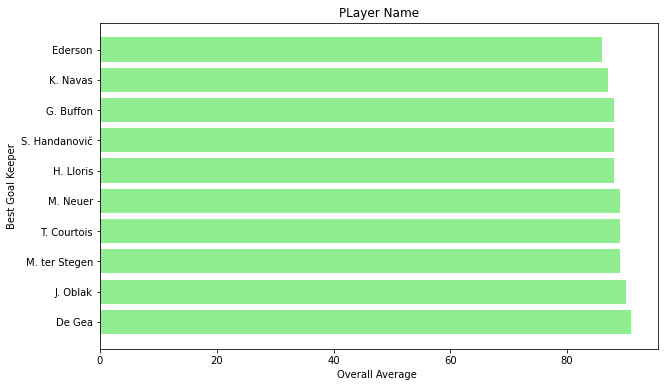

In [6]:
goalkeepers = df[df["Position"] == "GK"]

top_10_gks = goalkeepers.sort_values(by="Overall", ascending=False).head(10)

print("Top 10 Goalkeepers by Overall Rating:")
print(top_10_gks)

plt.figure(figsize=(10, 6))
plt.barh(top_10_gks['Name'], top_10_gks['Overall'], color='lightgreen')
plt.ylabel('Best Goal Keeper')
plt.xlabel('Overall Average ')
plt.title('PLayer Name')

In [10]:
df = pd.read_csv("fifa_eda.csv")
df.head()

df['Value'] = pd.to_numeric(df['Value']) 

top_10_players = df.sort_values(by="Value", ascending=False).head(10)

print("Top 10 Players by Value:")
print(top_10_players)


Top 10 Players by Value:
       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   
6  177003          L. Modrić   32     Croatia       91         91   
7  176580          L. Suárez   31     Uruguay       91         91   
8  155862       Sergio Ramos   32       Spain       91         91   
9  200389           J. Oblak   25    Slovenia       90         93   

                  Club  Value   Wage Preferred Foot  ...  Marking  \
0         FC Barcelona    NaN  €565K           Left  ...     33.0   
1             Juventus    NaN  €405K          Right  ...     28.0   
2  Paris

In [13]:
relevant_attributes = ["Preferred Foot", "International Reputation", "Weak Foot", "Skill Moves","Weak Foot","Skill Moves",
                       "Work Rate","Body Type","Position","Crossing","Finishing","HeadingAccuracy"
                       ,"ShortPassing","Volleys","Dribbling",'Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
                       'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
                       'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking',
                       'StandingTackle','SlidingTackle']

df["Avg_Attributes"] = df[relevant_attributes].mean(axis=1)


top_10_players = df.sort_values(by="Avg_Attributes", ascending=False).head(10)

print("Top 10 Players by Average of Selected Attributes:")
print(top_10_players[["Name", "Avg_Attributes"]]) 


Top 10 Players by Average of Selected Attributes:
              Name  Avg_Attributes
35         Marcelo       69.147059
45        P. Pogba       68.705882
4     K. De Bruyne       68.676471
6        L. Modrić       68.588235
36         G. Bale       68.558824
101  R. Nainggolan       68.294118
96        A. Vidal       68.029412
85        D. Alaba       67.882353
428       M. Acuña       67.794118
258    A. Florenzi       67.676471


C:\Users\Hp\AppData\Local\Temp\ipykernel_6340\4058549313.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Avg_Attributes"] = df[relevant_attributes].mean(axis=1)


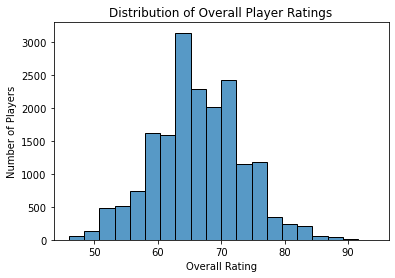

In [8]:
import seaborn as sns

sns.histplot(df["Overall"], bins=20)  
plt.xlabel("Overall Rating")
plt.ylabel("Number of Players")
plt.title("Distribution of Overall Player Ratings")
plt.show()


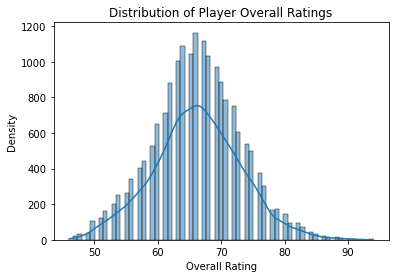

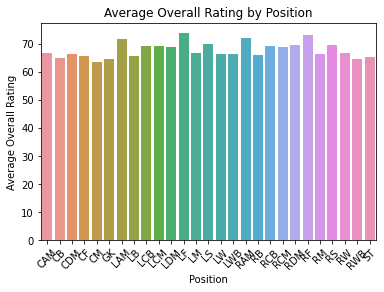

In [9]:
sns.histplot(df["Overall"], kde=True)  
plt.xlabel("Overall Rating")
plt.ylabel("Density")
plt.title("Distribution of Player Overall Ratings")
plt.show()


avg_overall_by_position = df.groupby("Position")["Overall"].mean()
sns.barplot(x=avg_overall_by_position.index, y=avg_overall_by_position.values)
plt.xlabel("Position")
plt.ylabel("Average Overall Rating")
plt.title("Average Overall Rating by Position")
plt.xticks(rotation=45) 
plt.show()


attack_attributes = ["Preferred Foot", "International Reputation", "Weak Foot", "Skill Moves","Weak Foot","Skill Moves",
                       "Work Rate","Body Type","Position","Crossing","Finishing","HeadingAccuracy"
                       ,"ShortPassing","Volleys","Dribbling",'Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
                       'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
                       'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking',
                       'StandingTackle','SlidingTackle']
correlation_matrix = df[attack_attributes].corr()





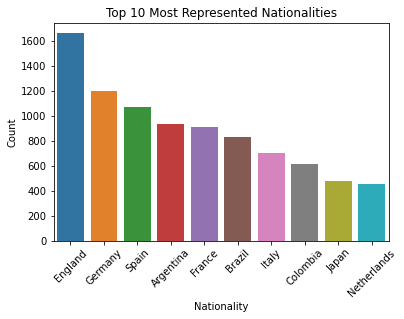

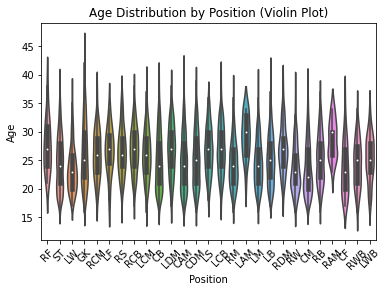

In [10]:
nationality_counts = df["Nationality"].value_counts().head(10)
sns.barplot(x=nationality_counts.index, y=nationality_counts.values)  
plt.title("Top 10 Most Represented Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()


sns.violinplot(x="Position", y="Age", showmeans=True, data=df)  
plt.title("Age Distribution by Position (Violin Plot)")
plt.xticks(rotation=45)  
plt.show()

In [11]:
skill_columns = [col for col in df.columns if not col in ["Name", "Age", "Nationality", "Overall", "Potential", "Club", "Value", "Wage","Preferred Foot", "International Reputation", "Weak Foot", "Skill Moves","Weak Foot","Skill Moves",
                       "Work Rate","Body Type","Position","Crossing","Finishing","HeadingAccuracy"
                       ,"ShortPassing","Volleys","Dribbling",'Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
                       'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
                       'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking',
                       'StandingTackle','SlidingTackle']]
df["Avg_Skills"] = df[skill_columns].mean(axis=1)

top_5_players = df.sort_values(by="Avg_Skills", ascending=False).head(5)

print("Top 5 Players by Average Skills (All Positions):")
print(top_5_players[["Name", "Avg_Skills"]])

Top 5 Players by Average Skills (All Positions):
             Name  Avg_Skills
13254  A. Aidonis    123205.0
13278  C. Mamengi    123078.5
13260     Hernáiz    123071.0
13270    Vinicius    122820.5
13280   Y. Ammour    122310.0


C:\Users\Hp\AppData\Local\Temp\ipykernel_20140\1252175228.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Avg_Skills"] = df[skill_columns].mean(axis=1)


In [41]:
skill_attributes = ["Preferred Foot", "International Reputation", "Weak Foot", "Skill Moves","Weak Foot","Skill Moves",
                       "Work Rate","Body Type","Position","Crossing","Finishing","HeadingAccuracy"
                       ,"ShortPassing","Volleys","Dribbling",'Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
                       'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
                       'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking',
                       'StandingTackle','SlidingTackle']


df["Avg_Skill_Score"] = df[skill_attributes].mean(axis=1)

top_players_by_position = df.groupby("Position").apply(
    lambda x: x.sort_values(by="Avg_Skill_Score", ascending=False).head(1)
)

print("Top Players by Position (Based on Average Skill Score):")
print(top_players_by_position[["Name", "Position", "Avg_Skill_Score"]])


Top Players by Position (Based on Average Skill Score):
                         Name Position  Avg_Skill_Score
Position                                               
CAM      101    R. Nainggolan      CAM        68.294118
CDM      72         M. Pjanić      CDM        65.970588
GK       14818     Guo Quanbo       GK        36.294118
LB       35           Marcelo       LB        69.147059
LCB      527      D. Criscito      LCB        63.382353
LCM      143        A. Witsel      LCM        66.823529
LF       5          E. Hazard       LF        64.941176
LW       32          Coutinho       LW        65.676471
RB       258      A. Florenzi       RB        67.676471
RCB      8       Sergio Ramos      RCB        66.264706
RCM      4       K. De Bruyne      RCM        68.676471
RF       0           L. Messi       RF        66.617647
RW       93        A. Sánchez       RW        65.117647
ST       36           G. Bale       ST        68.558824


C:\Users\Hp\AppData\Local\Temp\ipykernel_6340\3480145927.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Avg_Skill_Score"] = df[skill_attributes].mean(axis=1)


In [50]:
position_skills ={
  "GK": ["GKHandling","GKKicking","GKPositioning","GKReflexes"],
  "MID": ["ShortPassing","LongPassing","Vision","BallControl","Stamina","WorkRate","Agility","Balance","Dribbling","Reactions"],
  "DEF": ["Marking","StandingTackle","SlidingTackle","Interceptions","HeadingAccuracy","Strength","Aggression","Jumping","Positioning","SprintSpeed"],
  "FW": ["Finishing","ShotPower","LongShots","Acceleration","SprintSpeed","Positioning","Volleys","Composure","Agility","Balance"]
}


def calculate_avg_skill_score(player_row, position):
  
  skills = position_skills.get(position, [])
  
  if skills:
    return player_row[skills].mean()
  else:
    return 0  

df["Avg_Skill_Score"] = df.apply(lambda row: calculate_avg_skill_score(row, row["Position"]), axis=1)

top_players_by_position = df.groupby("Position").apply(lambda x: x.sort_values(by="Avg_Skill_Score", ascending=False).head(3))

print("Top Players by Position (Based on Average Skill Score):")
print(top_players_by_position[["Name", "Position", "Avg_Skill_Score"]])


Top Players by Position (Based on Average Skill Score):
                             Name Position  Avg_Skill_Score
Position                                                   
CAM      17          A. Griezmann      CAM             0.00
         11829           J. Calle      CAM             0.00
         11548         M. Laurent      CAM             0.00
CDM      20       Sergio Busquets      CDM             0.00
         11685          D. Potter      CDM             0.00
         11444    Adrián Rocheira      CDM             0.00
GK       3                 De Gea       GK            88.50
         22              M. Neuer       GK            87.75
         18         M. ter Stegen       GK            87.00
LB       35               Marcelo       LB             0.00
         12255          I. Vujica       LB             0.00
         12247      N. Pantaleone       LB             0.00
LCB      24          G. Chiellini      LCB             0.00
         9068          D. Balanta      LCB  

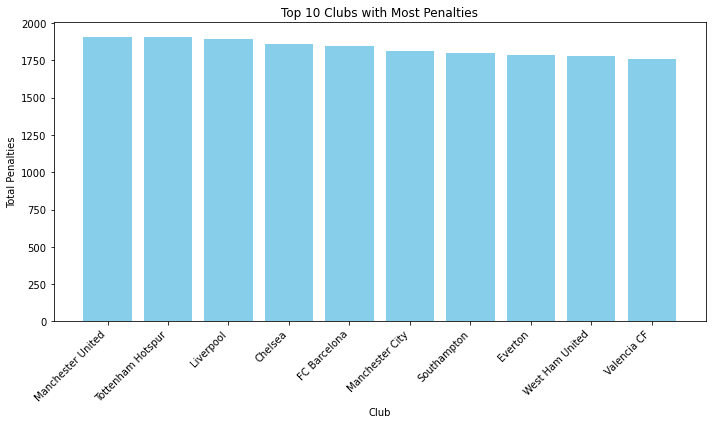

In [5]:
top_10_clubs = penalties_per_club.sort_values(ascending=False).head(10)

clubs = top_10_clubs.index.to_numpy()
penalties = top_10_clubs.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(clubs, penalties, color='skyblue')
plt.xlabel('Club')
plt.ylabel('Total Penalties')
plt.title('Top 10 Clubs with Most Penalties')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show(

Club
Manchester United    1909.0
Tottenham Hotspur    1907.0
Liverpool            1894.0
Chelsea              1862.0
FC Barcelona         1849.0
Manchester City      1816.0
Southampton          1801.0
Everton              1786.0
West Ham United      1777.0
Valencia CF          1757.0
Name: Penalties, dtype: float64


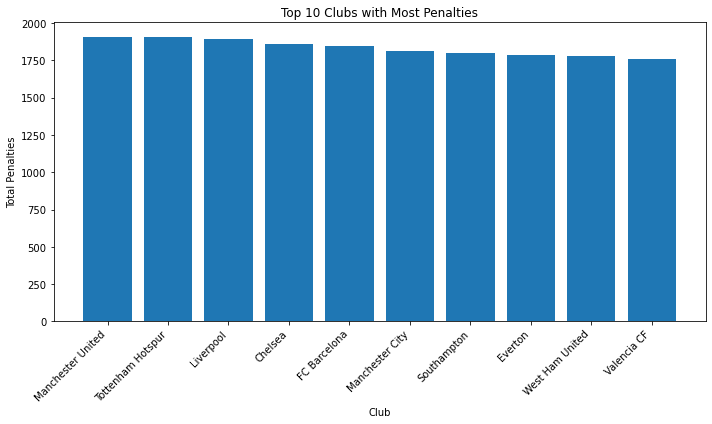

In [8]:
top_10_clubs = penalties_per_club.sort_values(ascending=False).head(10)

clubs = top_10_clubs.index.to_numpy()
total_penalties = top_10_clubs.to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(clubs, total_penalties)
plt.xlabel('Club')
plt.ylabel('Total Penalties')
plt.title('Top 10 Clubs with Most Penalties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

print(top_10_clubs)

In [13]:
club_spending = df.groupby('Club')['Value'].sum()

top_10_spenders = club_spending.sort_values(ascending=False).head(10)

top_10_spenders_millions = top_10_spenders / 1000000
formatted_millions = top_10_spenders_millions.apply(lambda x: "{:,.2f} Million".format(x))

print("\nTop 10 clubs and their total spending (in millions):")
print(formatted_millions)


Top 10 clubs and their total spending (in millions):
Club
FC Barcelona           48,227.00 Million
Real Madrid            46,571.26 Million
Manchester City        41,524.56 Million
Inter                  37,329.85 Million
Tottenham Hotspur      35,254.51 Million
Paris Saint-Germain    33,728.25 Million
Manchester United      32,342.50 Million
Juventus               32,259.75 Million
Atlético Madrid        31,990.26 Million
FC Bayern München      30,013.26 Million
Name: Value, dtype: object


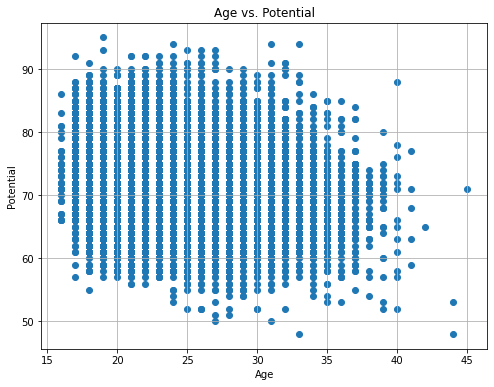

In [13]:
age = df['Age']
potential = df['Potential']

plt.figure(figsize=(8, 6))  
plt.scatter(age, potential)

plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('Age vs. Potential')

plt.grid(True)

plt.show()

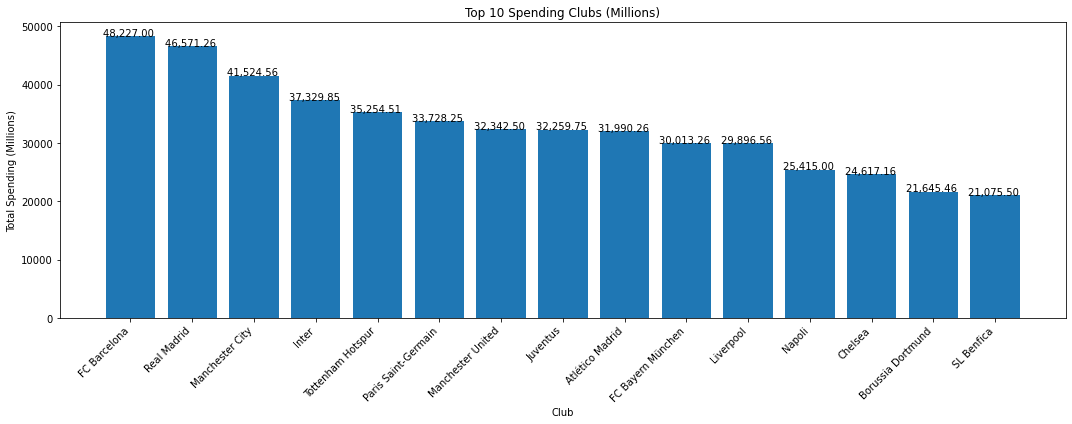


Top 10 clubs and their total spending (in millions):
Club
FC Barcelona           48,227.00 
Real Madrid            46,571.26 
Manchester City        41,524.56 
Inter                  37,329.85 
Tottenham Hotspur      35,254.51 
Paris Saint-Germain    33,728.25 
Manchester United      32,342.50 
Juventus               32,259.75 
Atlético Madrid        31,990.26 
FC Bayern München      30,013.26 
Liverpool              29,896.56 
Napoli                 25,415.00 
Chelsea                24,617.16 
Borussia Dortmund      21,645.46 
SL Benfica             21,075.50 
Name: Value, dtype: object


In [20]:
club_spending = df.groupby('Club')['Value'].sum()

top_10_spenders = club_spending.sort_values(ascending=False).head(15)

plt.figure(figsize=(15, 6))  
plt.bar(top_10_spenders_millions.index, top_10_spenders_millions)


plt.xlabel('Club')
plt.ylabel('Total Spending (Millions)')
plt.title('Top 10 Spending Clubs (Millions)')

plt.tight_layout() 
plt.show()

print("\nTop 10 clubs and their total spending (in millions):")
print(formatted_millions)


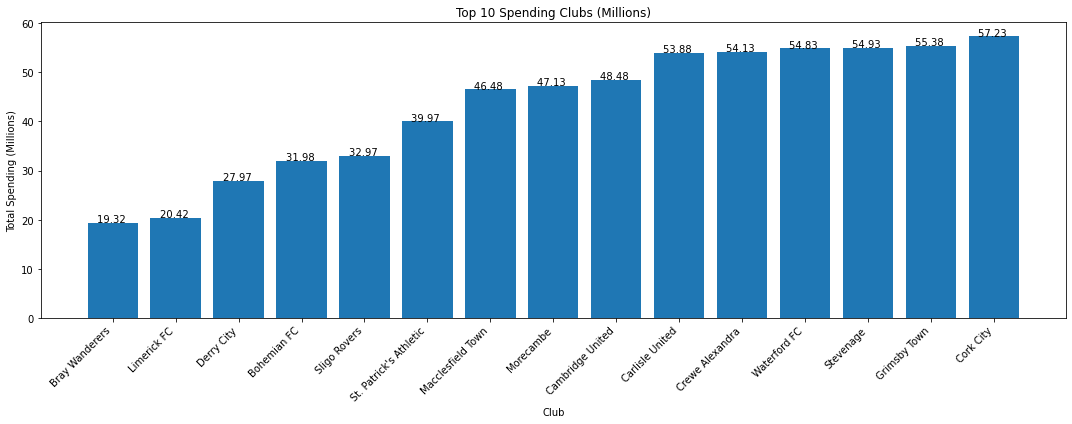


Top 10 clubs and their total spending (in millions):
Club
Bray Wanderers            19.32 
Limerick FC               20.42 
Derry City                27.97 
Bohemian FC               31.98 
Sligo Rovers              32.97 
St. Patrick's Athletic    39.97 
Macclesfield Town         46.48 
Morecambe                 47.13 
Cambridge United          48.48 
Carlisle United           53.88 
Crewe Alexandra           54.13 
Waterford FC              54.83 
Stevenage                 54.93 
Grimsby Town              55.38 
Cork City                 57.23 
Name: Value, dtype: object


In [26]:
club_spending = df.groupby('Club')['Value'].sum()

top_10_spenders = club_spending.sort_values(ascending=True).head(15)

plt.figure(figsize=(15, 6))  
plt.bar(top_10_spenders_millions.index, top_10_spenders_millions)
plt.xlabel('Club')
plt.ylabel('Total Spending (Millions)')
plt.title('Top 10 Spending Clubs (Millions)')

plt.show()

print("\nTop 10 clubs and their Less spending (in millions):")
print(formatted_millions)


In [17]:
contract_years = df['Contract Valid Until']

contract_years = pd.to_numeric(contract_years, errors='coerce')
player_count_by_year = contract_years.value_counts()

print("\nNumber of players with contract valid until each year:")
print(player_count_by_year)


Number of players with contract valid until each year:
2019.0    4819
2021.0    4360
2020.0    4027
2022.0    1477
2023.0    1053
2018.0     886
2024.0      23
2025.0       7
2026.0       2
Name: Contract Valid Until, dtype: int64


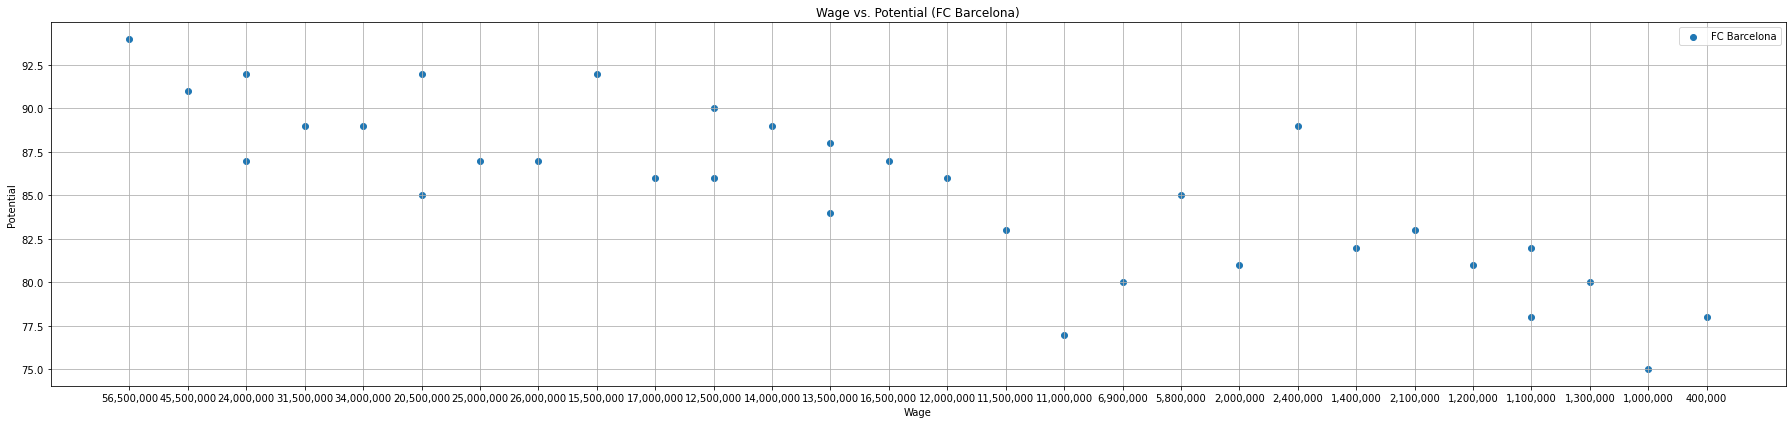

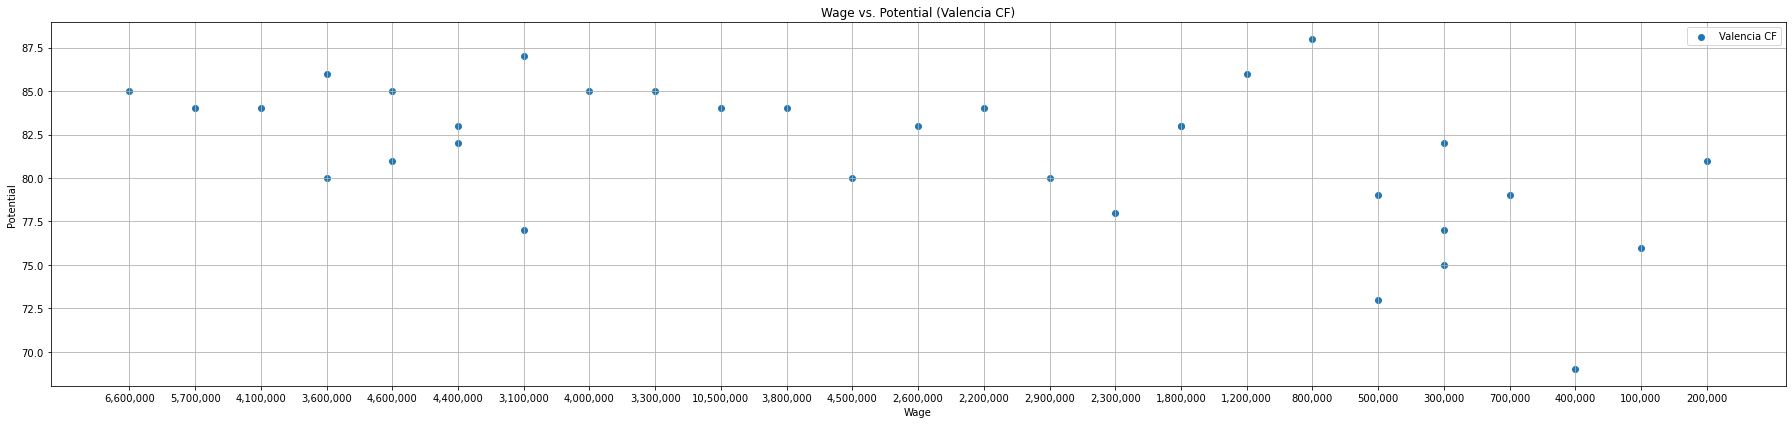

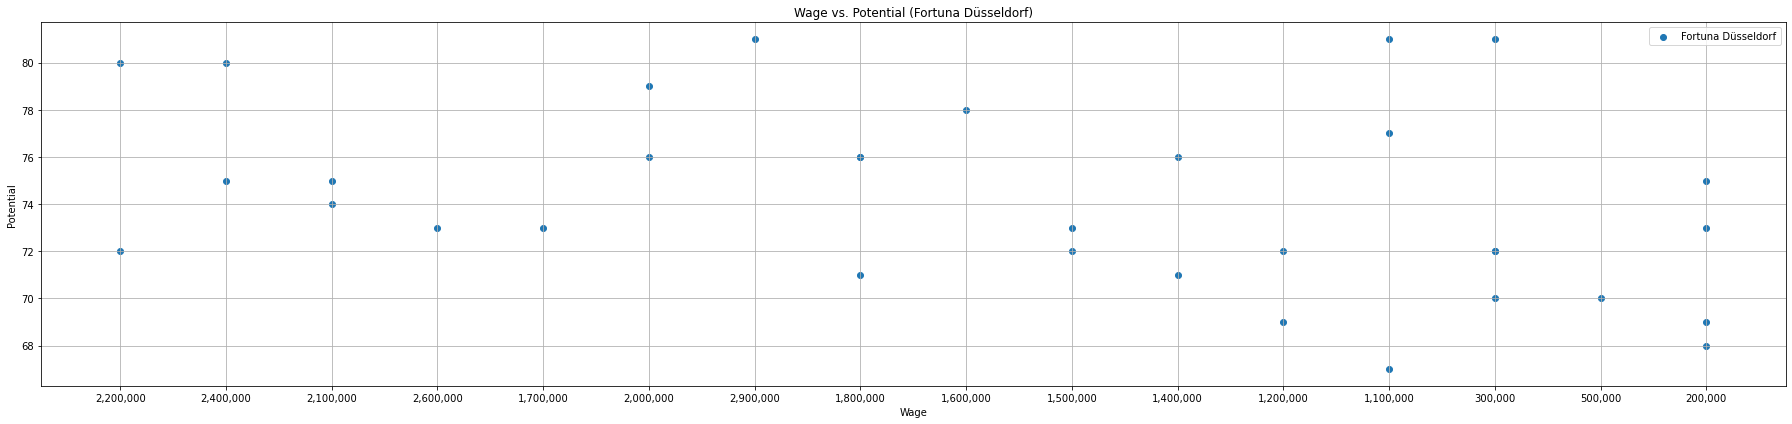

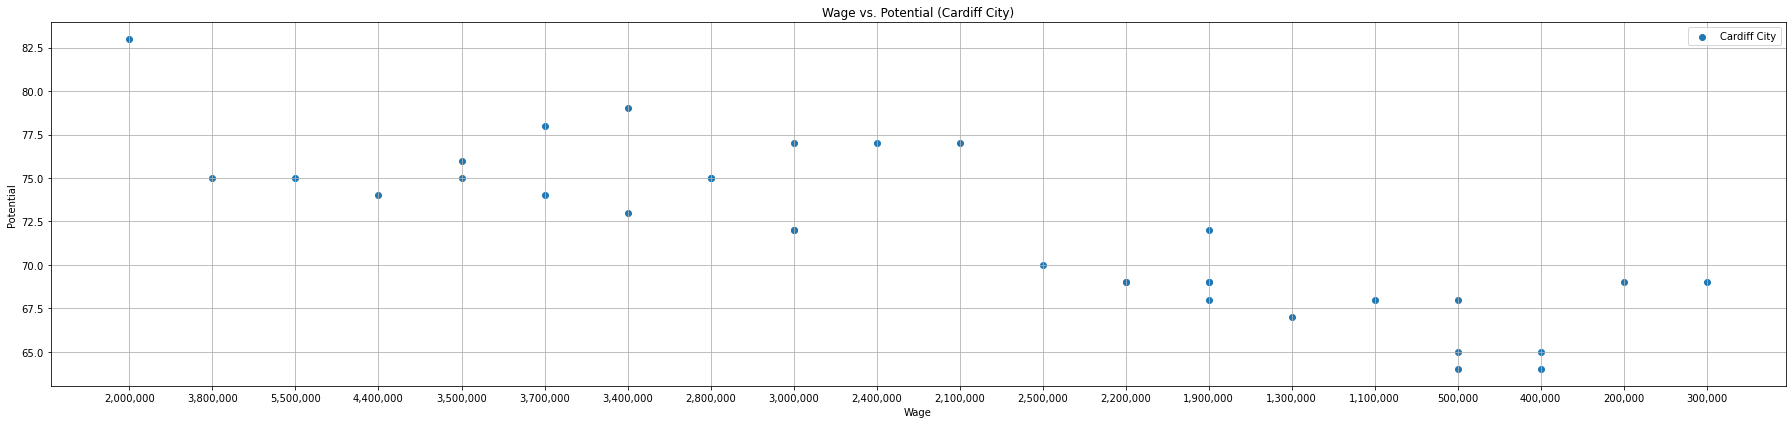

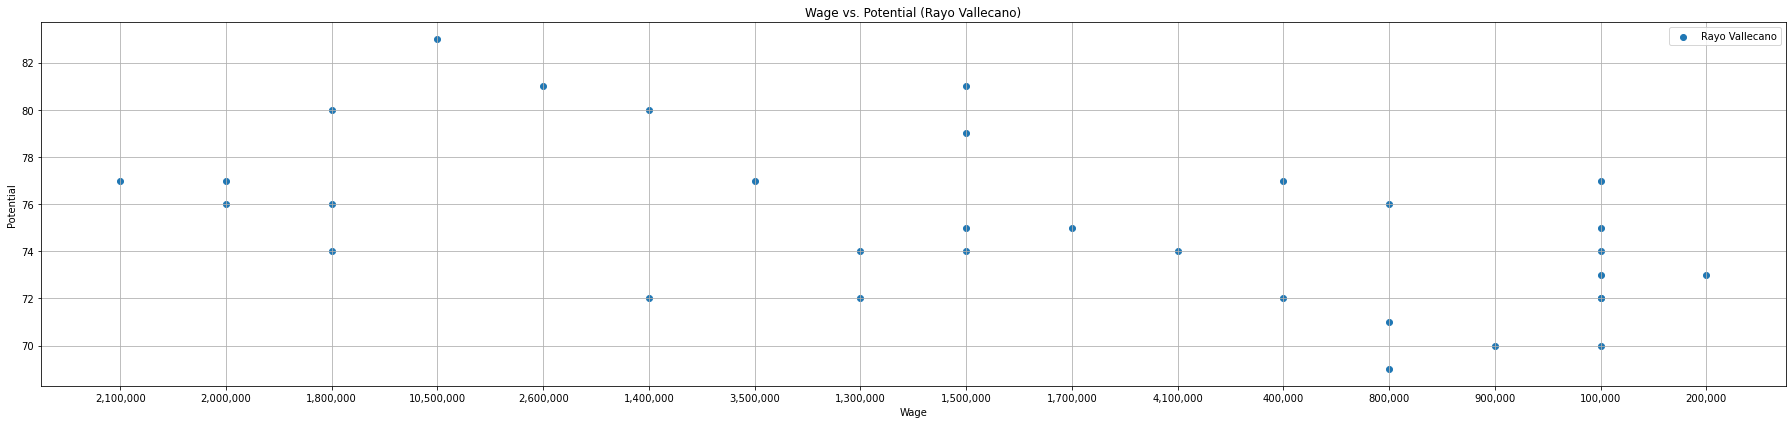

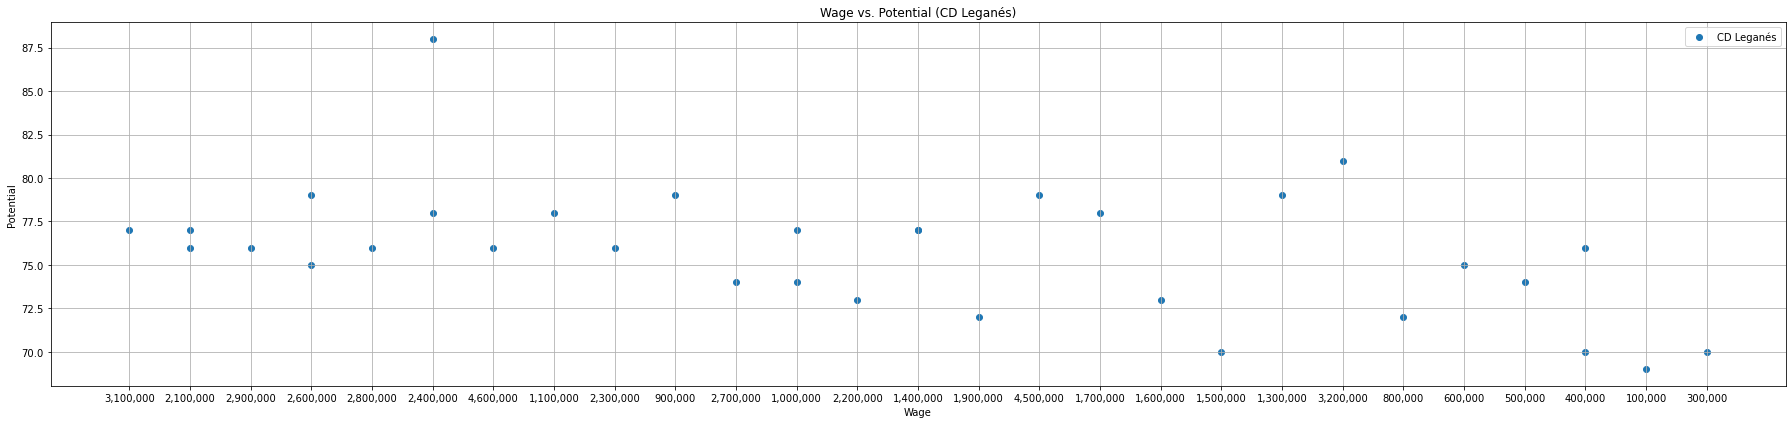

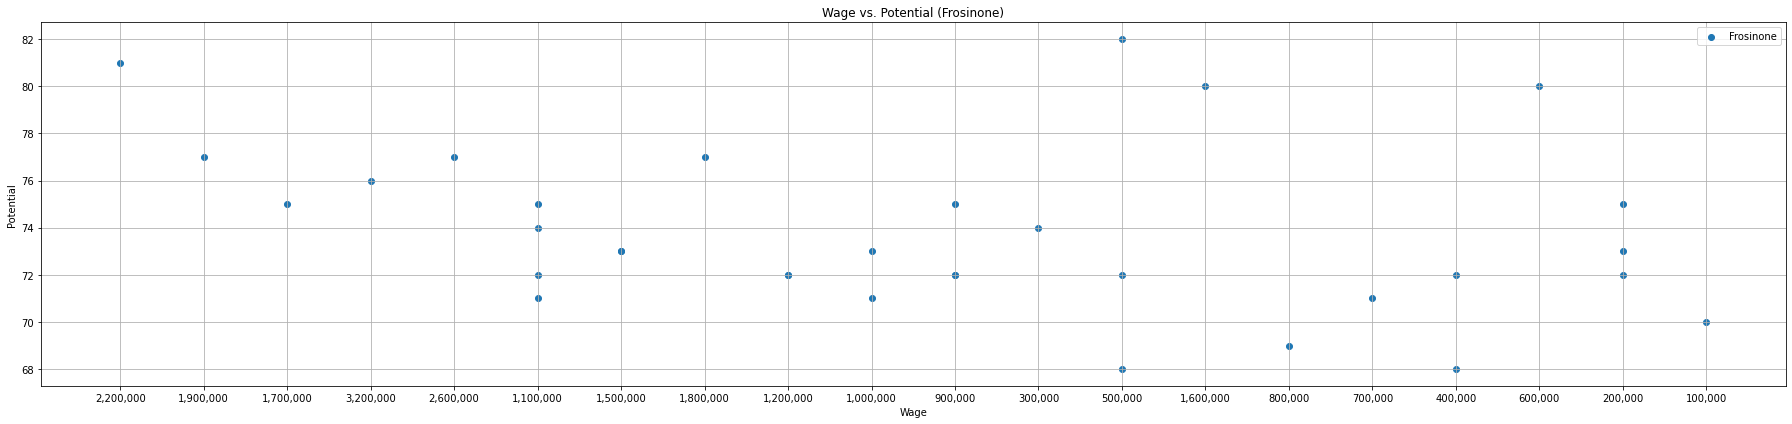

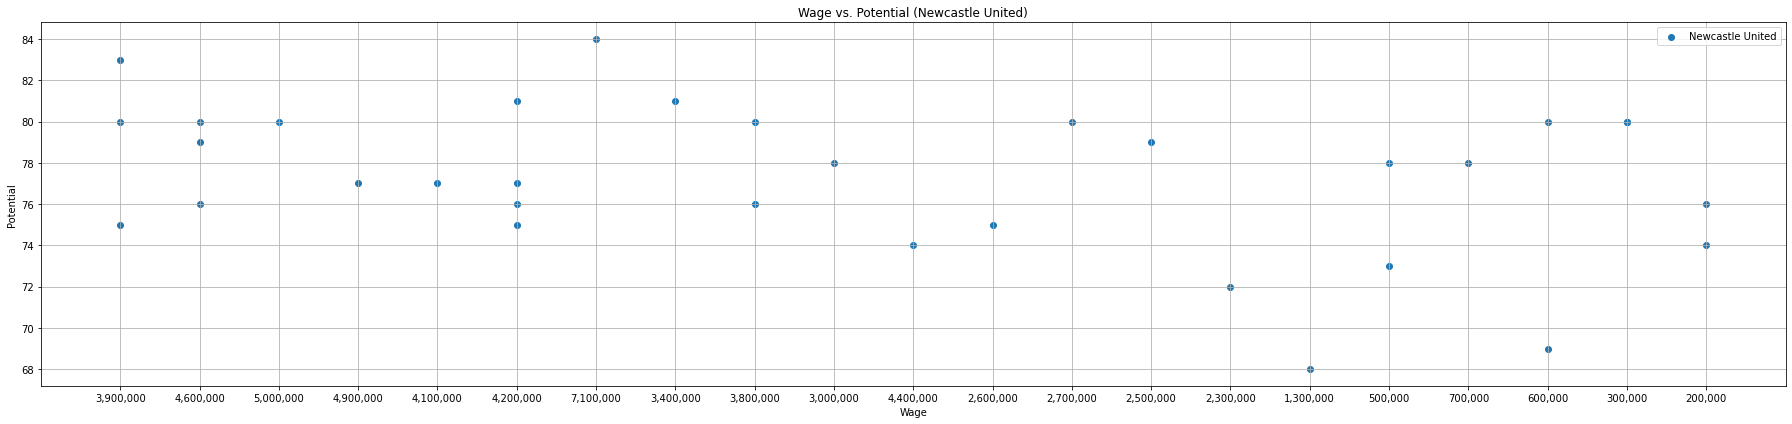

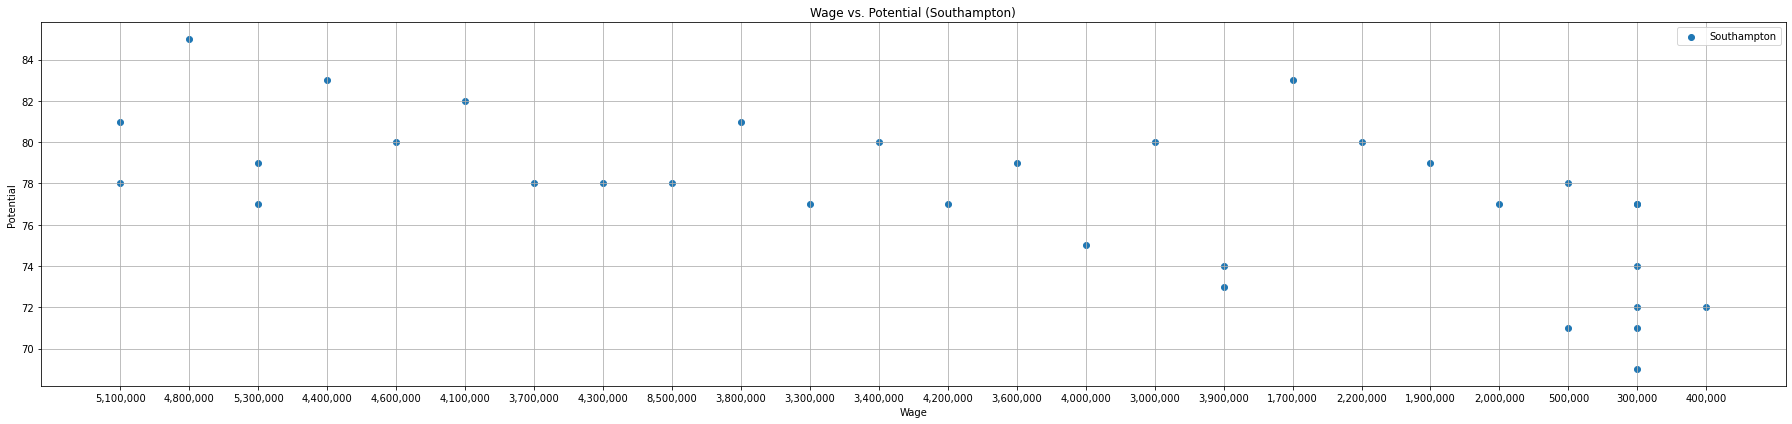

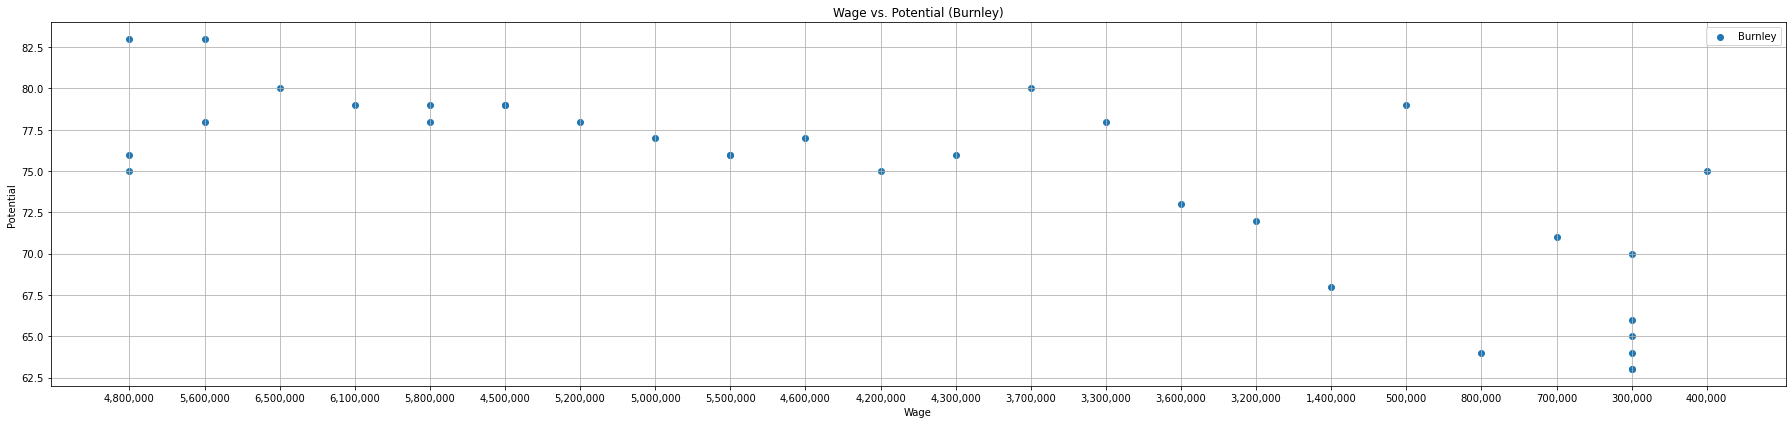

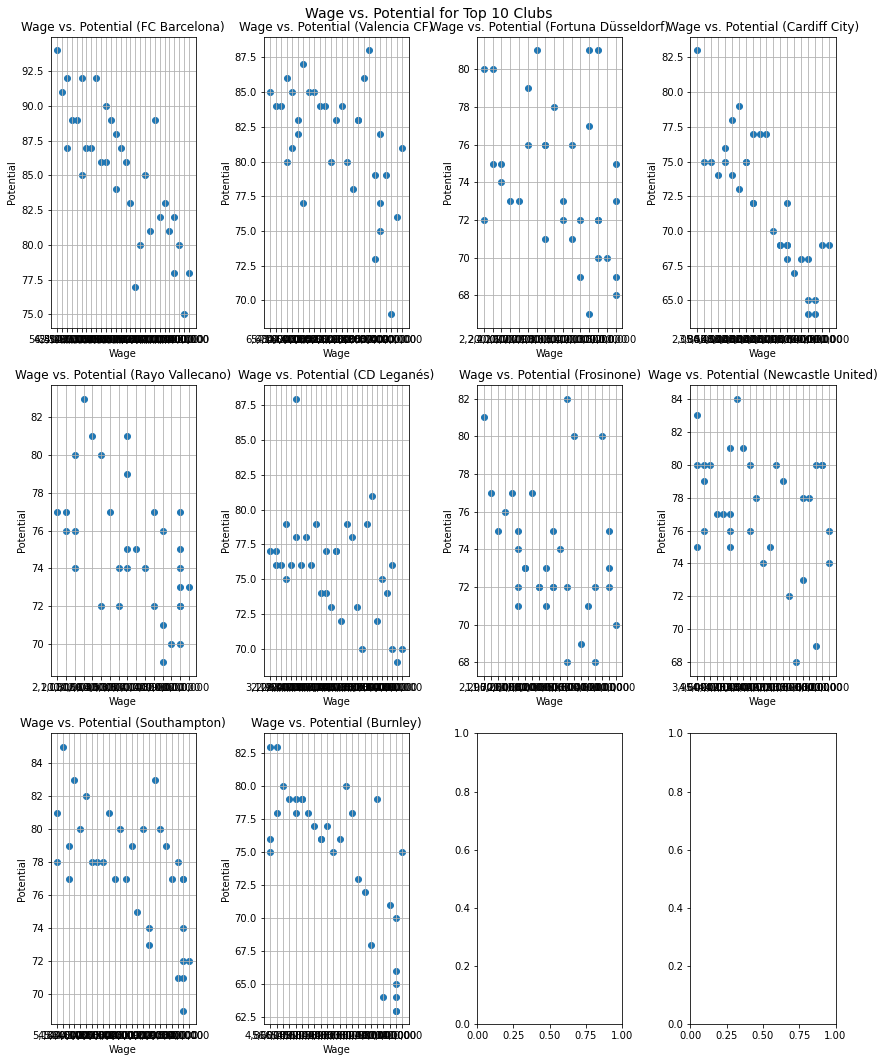

In [50]:
#Copied from Internet Sources 

# Select relevant columns (adjust if needed)
clubs = data['Club']  # Assuming 'Club' is the column for club names

# Group data by club
club_data = data.groupby('Club')

# Function to create a scatter plot for a club
def plot_club_data(club_name, club_data):
    plt.figure(figsize=(25, 6))  # Adjust figure size as needed
    plt.scatter(club_data['Wage'], club_data['Potential'], label=club_name)
    plt.xlabel('Wage')
    plt.ylabel('Potential')
    plt.title(f'Wage vs. Potential ({club_name})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

# Identify top 10 clubs (adjust sorting criteria if needed)
top_10_clubs = clubs.value_counts().nlargest(10).index.tolist()

# Create scatter plots for top 10 clubs
for club in top_10_clubs:
    club_data_subset = club_data.get_group(club)  # Get data for a specific club
    plot_club_data(club, club_data_subset)  # Plot the data for that club

# Optional: Show all plots at once (might be crowded for many clubs)
plt.show()

# OR (alternative approach)

# Create subplots for better organization (adjust layout as needed)
rows, cols = 3, 4  # Adjust rows and columns based on the number of top clubs
fig, axes = plt.subplots(rows, cols, figsize=(12, 15))  # Create a grid of subplots

# Plot each club on a separate subplot
for i, club in enumerate(top_10_clubs):
    row, col = divmod(i, cols)  # Calculate row and column indices
    club_data_subset = club_data.get_group(club)
    axes[row, col].scatter(club_data_subset['Wage'], club_data_subset['Potential'], label=club)
    axes[row, col].set_xlabel('Wage')
    axes[row, col].set_ylabel('Potential')
    axes[row, col].set_title(f'Wage vs. Potential ({club})')
    axes[row, col].grid(True)

# Optional: Adjust layout and show all plots
fig.suptitle('Wage vs. Potential for Top 10 Clubs', fontsize=14)  # Add a main title
plt.tight_layout()
plt.show()
